In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error

In [2]:
# Load data
df = pd.read_csv('CTLT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,30.860001,31.260000,30.240000,30.910000,30.910000,1201700
1,2019-01-03,30.660000,30.660000,29.290001,29.840000,29.840000,1149900
2,2019-01-04,30.049999,31.360001,29.940001,31.080000,31.080000,3530400
3,2019-01-07,31.020000,32.180000,30.850000,32.000000,32.000000,1063400
4,2019-01-08,32.340000,33.060001,32.150002,32.790001,32.790001,1391000
...,...,...,...,...,...,...,...
1079,2023-04-17,46.009998,49.860001,42.529999,45.430000,45.430000,14629300
1080,2023-04-18,45.200001,45.375000,41.509998,42.080002,42.080002,10057000
1081,2023-04-19,41.419998,43.669998,41.330002,43.070000,43.070000,6744900
1082,2023-04-20,42.660000,44.410000,42.259998,44.400002,44.400002,3464300


In [3]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)

In [4]:
# Show DataFrame
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,30.860001,31.260000,30.240000,30.910000,30.910000,1201700
2019-01-03,30.660000,30.660000,29.290001,29.840000,29.840000,1149900
2019-01-04,30.049999,31.360001,29.940001,31.080000,31.080000,3530400
2019-01-07,31.020000,32.180000,30.850000,32.000000,32.000000,1063400
2019-01-08,32.340000,33.060001,32.150002,32.790001,32.790001,1391000
...,...,...,...,...,...,...
2023-04-17,46.009998,49.860001,42.529999,45.430000,45.430000,14629300
2023-04-18,45.200001,45.375000,41.509998,42.080002,42.080002,10057000
2023-04-19,41.419998,43.669998,41.330002,43.070000,43.070000,6744900


In [5]:
# Descriptive Statistical
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1.084000e+03
mean,81.386891,82.582040,80.080622,81.360083,81.360083,1.316687e+06
std,29.623591,29.926995,29.218822,29.553762,29.553762,1.607532e+06
min,30.049999,30.660000,29.290001,29.840000,29.840000,2.197000e+05
25%,52.202500,53.042000,51.707500,52.247501,52.247501,7.046750e+05
50%,83.495002,84.510002,82.259998,83.505001,83.505001,9.811000e+05
75%,106.260000,108.073750,104.765001,106.450002,106.450002,1.423700e+06
max,142.639999,142.639999,140.779999,142.350006,142.350006,3.083880e+07


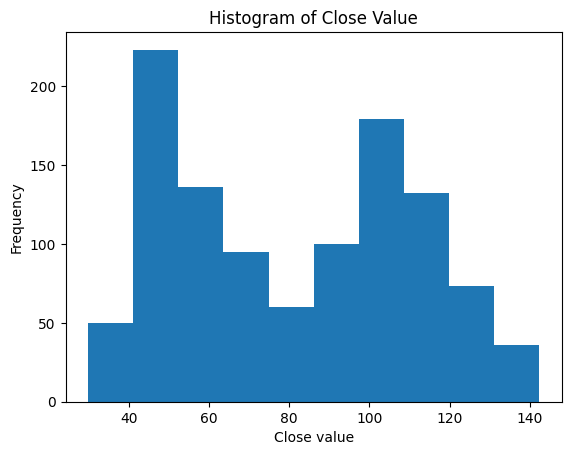

In [6]:
#  Draw a histogram
plt.hist(df['Close'])

# Set label and title
plt.xlabel('Close value')
plt.ylabel('Frequency')
plt.title('Histogram of Close Value')

# Display histogram
plt.show()

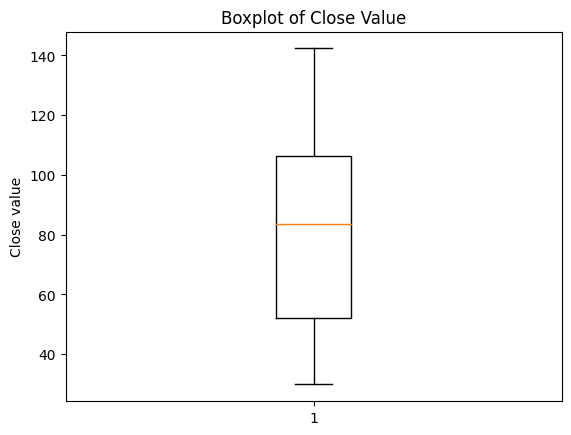

In [7]:
# Draw a boxplot
plt.boxplot(df.Close)

# Set label and title
plt.title("Boxplot of Close Value")
plt.ylabel("Close value")

# Hiển thị biểu đồ
plt.show()

In [8]:
# Select column 'Close'
df_Close = df[['Close']]

In [9]:
# Split the data into train, test, and validate sets in a ratio of 6:2:2
train_size = int(0.6 * len(df_Close))
test_size = int(0.2 * len(df_Close))
val_size = len(df_Close) - train_size - test_size

train_data = df_Close[: train_size]
test_data = df_Close[train_size : train_size + test_size]
val_data = df_Close[train_size + test_size :]

In [10]:
# Training on the train set and testing on the test set
history = train_data.Close.tolist()
y_pred = []

for i in test_data.Close:
  model = SimpleExpSmoothing(history)
  model_fit = model.fit(smoothing_level = 0.7)
  prediction = model_fit.forecast()  
  y_pred.append(prediction[0])
  history.append(i)

In [11]:
# Using the train set and the test set for training, then predicting on the validation set
y_pred_val = []

for i in val_data.Close:
  model = SimpleExpSmoothing(history)
  model_fit = model.fit(smoothing_level = 0.7)
  prediction = model_fit.forecast()  
  y_pred_val.append(prediction[0])
  history.append(i)

In [12]:
# Evaluate the accuracy of test
test_mae = mean_absolute_error(test_data, y_pred)
test_mape = mean_absolute_percentage_error(test_data, y_pred)
test_mse = mean_squared_error(test_data, y_pred)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(test_data, y_pred)

print(f"MAE on Test set: ", test_mae)
print(f"MAPE on Test set: ", test_mape)
print(f"MSE on Test set: ", test_mse)
print(f"RMSE on Test set: ", test_rmse)
print(f"MSLE on Test set: ", test_msle)

MAE on Test set:  2.1321871011745706
MAPE on Test set:  0.018917639089341923
MSE on Test set:  7.80200340835135
RMSE on Test set:  2.7932066533558433
MSLE on Test set:  0.0006232516423410806


In [13]:
# Evaluate the accuracy of validate
val_mae = mean_absolute_error(val_data, y_pred_val)
val_mape = mean_absolute_percentage_error(val_data, y_pred_val)
val_mse = mean_squared_error(val_data, y_pred_val)
val_rmse = np.sqrt(val_mse)
val_msle = mean_squared_log_error(val_data, y_pred_val)

print(f"MAE on Validate set: ",val_mae)
print(f"MAPE on Validate set: ", val_mape)
print(f"MSE on Validate set: ", val_mse)
print(f"RMSE on Validate set: ", val_rmse)
print(f"MSLE on Validate set: ", val_msle)

MAE on Validate set:  2.1212826005471497
MAPE on Validate set:  0.03194343501803299
MSE on Validate set:  9.517953588151926
RMSE on Validate set:  3.085118083340073
MSLE on Validate set:  0.0023543633716682096


In [14]:
# The process of creating index predict next 30 days

# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)

# Create a list of indices starting from the next date for 30 days
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

# Predict the closing prices for the next 30 days
y_next_30_days = []

for i in range(30):
  model = SimpleExpSmoothing(history)
  model_fit = model.fit(smoothing_level = 0.7)
  prediction = model_fit.forecast()  
  y_next_30_days.append(prediction[0])
  history.append(prediction[0])

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[44.73655367478595, 44.73655367478595, 44.73655367478595, 44.73655367478595, 44.73655367478595, 44.73655367478595, 44.73655367478595, 44.73655367478595, 44.73655367478595, 44.73655367478595, 44.73655367478595, 44.73655367478595, 44.73655367478595, 44.73655367478595, 44.73655367478595, 44.73655367478595, 44.73655367478595, 44.73655367478595, 44.73655367478595, 44.73655367478595, 44.73655367478595, 44.73655367478595, 44.73655367478595, 44.73655367478595, 44.73655367478595, 44.73655367478595, 44.73655367478595, 44.73655367478595, 44.73655367478595, 44.73655367478595]


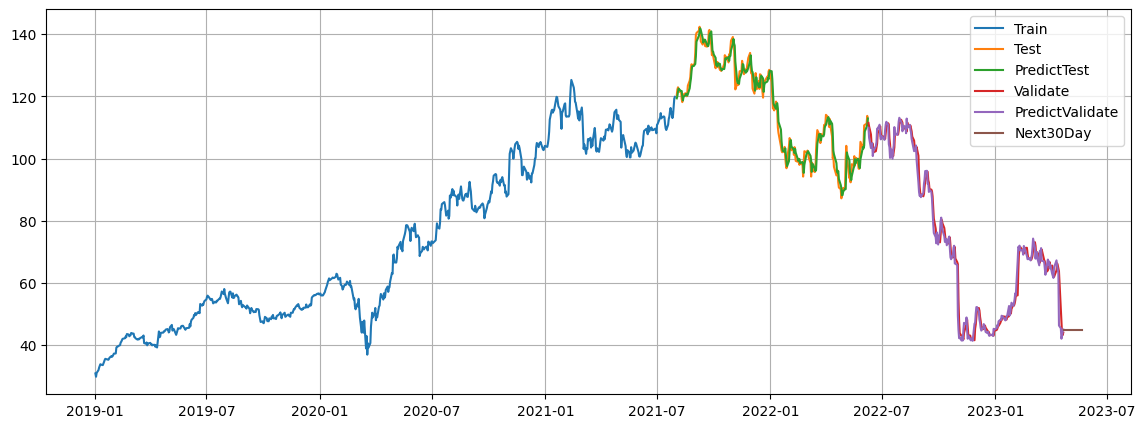

In [15]:
# Drawing
plt.figure(figsize=(14, 5))
plt.plot(df.index[:train_size], train_data)
plt.plot(df.index[train_size : train_size + test_size], test_data)
plt.plot(df.index[train_size : train_size + test_size], y_pred)
plt.plot(df.index[train_size + test_size :], y_pred_val)
plt.plot(df.index[train_size + test_size :], val_data)
plt.plot(index_next_30_days, y_next_30_days)
plt.legend(['Train', 'Test', 'PredictTest', 'Validate', 'PredictValidate', 'Next30Day'])
plt.grid()
plt.savefig('IS403_ETS_CTLT.png')
plt.show()